**Atualizando a biblioteca para plotagem de gráficos**


In [71]:
%pip install --upgrade -q pandas numpy seaborn matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


**Importando bibliotecas**

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.compose import ColumnTransformer
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Abrindo um arquivo CSV do drive**

In [73]:
base = pd.read_csv("restaurante.csv", delimiter=";")
base = base.drop(base.columns[0], axis=1)

print(base)
print(base.head(3))
print(base.tail(2))

   Alternativo  Bar Sex/Sab fome Cliente Preço Chuva  Res       Tipo  Tempo  \
0          Sim  Não     Não  Sim  Alguns   RRR   Não  Sim    Francês   0-10   
1          Sim  Não     Não  Sim   Cheio     R   Não  Não  Tailandês  30-60   
2          Não  Sim     Não  Não  Alguns     R   Não  Não  Hamburger   0-10   
3          Sim  Não     Sim  Sim   Cheio     R   Sim  Não  Tailandês  10-30   
4          Sim  Não     Sim  Não   Cheio   RRR   Não  Sim    Francês    >60   
5          Não  Sim     Não  Sim  Alguns    RR   Sim  Sim   Italiano   0-10   
6          Não  Sim     Não  Não  Nenhum     R   Sim  Não  Hamburger   0-10   
7          Não  Não     Não  Sim  Alguns    RR   Sim  Sim  Tailandês   0-10   
8          Não  Sim     Sim  Não   Cheio     R   Sim  Não  Hamburger    >60   
9          Sim  Sim     Sim  Sim   Cheio   RRR   Não  Sim   Italiano  10-30   
10         Não  Não     Não  Não  Nenhum     R   Não  Não  Tailandês   0-10   
11         Sim  Sim     Sim  Sim   Cheio     R   Não

**Contando quantidade de instâncias**


/home/baraggam/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/baraggam/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/baraggam/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='conc', ylabel='count'>

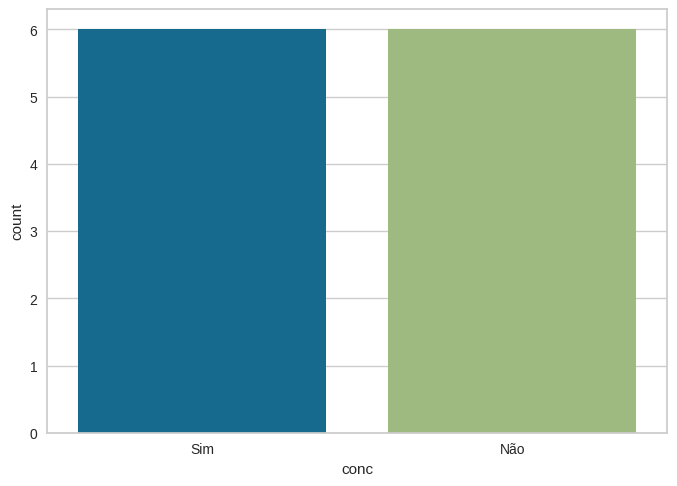

In [74]:
np.unique(base["conc"], return_counts=True)
sns.countplot(x=base["conc"])

**Separando os atributos de entrada e de classe**

In [75]:
X_prev = X_prev_label = base.iloc[:, 0:10].values
y_classe = base.iloc[:, 10].values

print(X_prev)
print(X_prev_label)
print(X_prev[:, 4])
print(y_classe)

[['Sim' 'Não' 'Não' 'Sim' 'Alguns' 'RRR' 'Não' 'Sim' 'Francês' '0-10']
 ['Sim' 'Não' 'Não' 'Sim' 'Cheio' 'R' 'Não' 'Não' 'Tailandês' '30-60']
 ['Não' 'Sim' 'Não' 'Não' 'Alguns' 'R' 'Não' 'Não' 'Hamburger' '0-10']
 ['Sim' 'Não' 'Sim' 'Sim' 'Cheio' 'R' 'Sim' 'Não' 'Tailandês' '10-30']
 ['Sim' 'Não' 'Sim' 'Não' 'Cheio' 'RRR' 'Não' 'Sim' 'Francês' '>60']
 ['Não' 'Sim' 'Não' 'Sim' 'Alguns' 'RR' 'Sim' 'Sim' 'Italiano' '0-10']
 ['Não' 'Sim' 'Não' 'Não' 'Nenhum' 'R' 'Sim' 'Não' 'Hamburger' '0-10']
 ['Não' 'Não' 'Não' 'Sim' 'Alguns' 'RR' 'Sim' 'Sim' 'Tailandês' '0-10']
 ['Não' 'Sim' 'Sim' 'Não' 'Cheio' 'R' 'Sim' 'Não' 'Hamburger' '>60']
 ['Sim' 'Sim' 'Sim' 'Sim' 'Cheio' 'RRR' 'Não' 'Sim' 'Italiano' '10-30']
 ['Não' 'Não' 'Não' 'Não' 'Nenhum' 'R' 'Não' 'Não' 'Tailandês' '0-10']
 ['Sim' 'Sim' 'Sim' 'Sim' 'Cheio' 'R' 'Não' 'Não' 'Hamburger' '30-60']]
[['Sim' 'Não' 'Não' 'Sim' 'Alguns' 'RRR' 'Não' 'Sim' 'Francês' '0-10']
 ['Sim' 'Não' 'Não' 'Sim' 'Cheio' 'R' 'Não' 'Não' 'Tailandês' '30-60']
 ['Não'

**Tratamento de dados categóricos**

> *LabelEncoder - Vamos tratar os dados categóricos colocando 1, 2, 3 e etc**



In [76]:
label_encoder = LabelEncoder()

colunas_para_codificar = [0, 1, 2, 3, 4, 5, 6, 7, 9]

for coluna in colunas_para_codificar:
    X_prev[:, coluna] = label_encoder.fit_transform(X_prev[:, coluna])

print(X_prev)

[[1 0 0 1 0 2 0 1 'Francês' 0]
 [1 0 0 1 1 0 0 0 'Tailandês' 2]
 [0 1 0 0 0 0 0 0 'Hamburger' 0]
 [1 0 1 1 1 0 1 0 'Tailandês' 1]
 [1 0 1 0 1 2 0 1 'Francês' 3]
 [0 1 0 1 0 1 1 1 'Italiano' 0]
 [0 1 0 0 2 0 1 0 'Hamburger' 0]
 [0 0 0 1 0 1 1 1 'Tailandês' 0]
 [0 1 1 0 1 0 1 0 'Hamburger' 3]
 [1 1 1 1 1 2 0 1 'Italiano' 1]
 [0 0 0 0 2 0 0 0 'Tailandês' 0]
 [1 1 1 1 1 0 0 0 'Hamburger' 2]]


**Contando quantas opções de resposta tem cada atributo**

In [77]:
len(np.unique(base["Cliente"]))

3



> OneHotEncoder - Agora vamos binarizar atributos não ordinais

In [78]:
onehotencoder_tipo = ColumnTransformer(
    transformers=[("OneHot", OneHotEncoder(), [8])], remainder="passthrough"
)
print(X_prev[0])
X_prev = onehotencoder_tipo.fit_transform(X_prev)

# print(
#     onehotencoder_tipo.get_feature_names_out()
# )  # Pegar os nomes das novas colunas criadas

print(X_prev[0])
print(X_prev.shape)

[1 0 0 1 0 2 0 1 'Francês' 0]
[1.0 0.0 0.0 0.0 1 0 0 1 0 2 0 1 0]
(12, 13)


**Método de amostragem Holdout**

In [79]:
print(X_prev)
print(y_classe)
print(y_classe.shape)

X_treino, X_teste, y_treino, y_teste = train_test_split(
    X_prev, y_classe, test_size=0.20, random_state=23
)

print(X_treino.shape)
print(X_teste.shape)

[[1.0 0.0 0.0 0.0 1 0 0 1 0 2 0 1 0]
 [0.0 0.0 0.0 1.0 1 0 0 1 1 0 0 0 2]
 [0.0 1.0 0.0 0.0 0 1 0 0 0 0 0 0 0]
 [0.0 0.0 0.0 1.0 1 0 1 1 1 0 1 0 1]
 [1.0 0.0 0.0 0.0 1 0 1 0 1 2 0 1 3]
 [0.0 0.0 1.0 0.0 0 1 0 1 0 1 1 1 0]
 [0.0 1.0 0.0 0.0 0 1 0 0 2 0 1 0 0]
 [0.0 0.0 0.0 1.0 0 0 0 1 0 1 1 1 0]
 [0.0 1.0 0.0 0.0 0 1 1 0 1 0 1 0 3]
 [0.0 0.0 1.0 0.0 1 1 1 1 1 2 0 1 1]
 [0.0 0.0 0.0 1.0 0 0 0 0 2 0 0 0 0]
 [0.0 1.0 0.0 0.0 1 1 1 1 1 0 0 0 2]]
['Sim' 'Não' 'Sim' 'Sim' 'Não' 'Sim' 'Não' 'Sim' 'Não' 'Não' 'Não' 'Sim']
(12,)
(9, 13)
(3, 13)


**Vamos experimentar agora o algoritmo Decision Tree?**

In [80]:
modelo = tree.DecisionTreeClassifier(criterion="entropy")
Y = modelo.fit(X_treino, y_treino)

**Vamos testar o modelo?**

In [81]:
previsoes = modelo.predict(X_teste)

**Será se o modelo acertou?**

              precision    recall  f1-score   support

         Não       0.00      0.00      0.00         1
         Sim       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



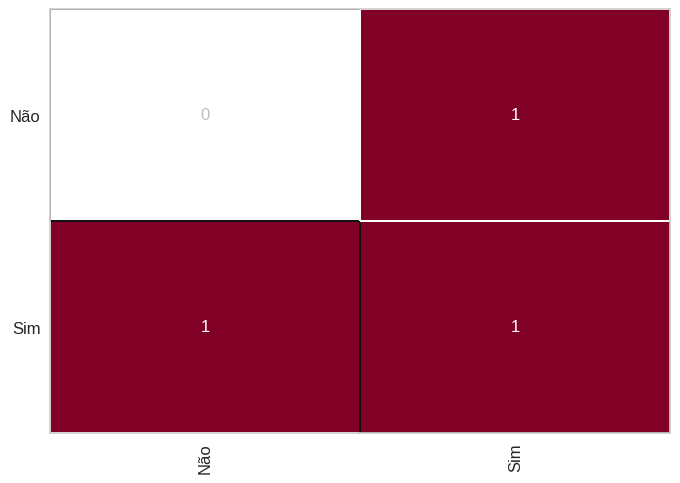

In [82]:
y_teste
accuracy_score(y_teste, previsoes)
confusion_matrix(y_teste, previsoes)

cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

print(classification_report(y_teste, previsoes))

**Vamos ver a árvore?**

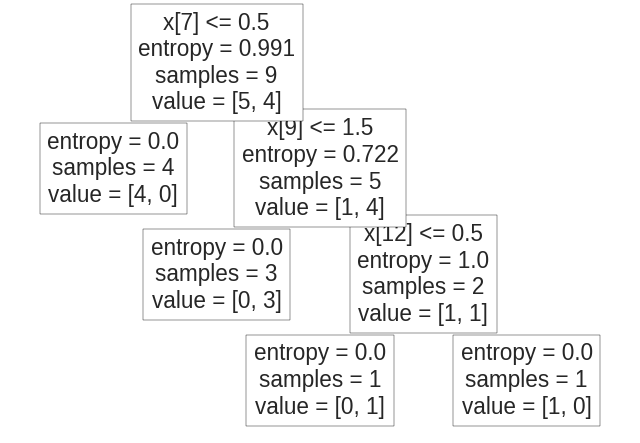

In [83]:
plt.show(tree.plot_tree(Y))

**O que você achou? podemos fazê-la melhor! :-)**

[Text(0.3333333333333333, 0.875, 'Fome <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [5, 4]\nclass = Não'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Não'),
 Text(0.5, 0.625, 'Preço <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = Sim'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Sim'),
 Text(0.6666666666666666, 0.375, 'Tipo <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = Não'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Sim'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Não')]

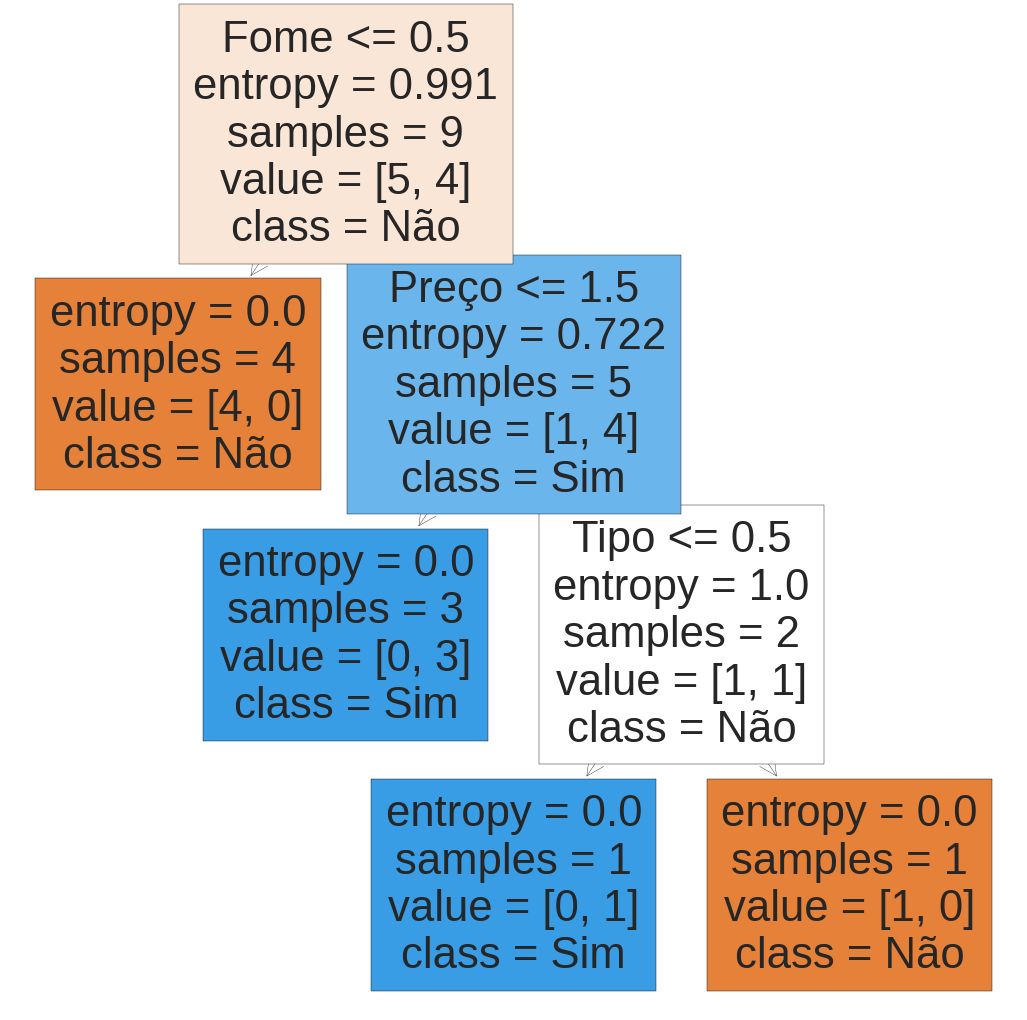

In [84]:
previsores = [
    "Francês",
    "Hamburger",
    "Italiano",
    "Tailandês",
    "Alternativo",
    "Bar",
    "Sex/Sab",
    "Fome",
    "Cliente",
    "Preço",
    "Chuva",
    "Res",
    "Tipo",
    "Tempo",
]

figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(13, 13))
tree.plot_tree(
    modelo, feature_names=previsores, class_names=modelo.classes_.tolist(), filled=True
)